## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Kode diatas merupakan kode yang digunakan untuk meng-import library apa saja yang digunakan

## Load Dataset

In [2]:
# Load the dataset Movie_Id_Titles
link = 'https://raw.githubusercontent.com/go0se05/Recommendation-system/refs/heads/main/Movie_Recommendation%20system/Movie_Id_Titles.csv'
title_df = pd.read_csv(link)

In [3]:
# Load the dataset Movie Rating
url = 'https://raw.githubusercontent.com/go0se05/Recommendation-system/refs/heads/main/Movie_Recommendation%20system/Dataset.csv'
rating_df = pd.read_csv(url)

Kode diatas digunakan untuk mengunduh dataset yang berada di github dengan menggunakan link url github terdapat dua dataset yaitu :
* `movie_title`
* `movie_rating`

## Data Understanding

In [4]:
rating_df = pd.read_csv(url)
title_df= pd.read_csv(link)

print("Jumlah data penilaian:", len(rating_df))
print("Jumlah data judul:", len(title_df))

Jumlah data penilaian: 100003
Jumlah data judul: 1682


### Univariate Exploratory Data Analysis

variabel-variabel yang terdapat pada dataset Movie Recommendation System adalah sebagai berikut:

* **Rating** : Merupakan data-data penilaian dari para customer
* **Title** : Data yang berisi judul-judul film

### Rating Variabel

In [5]:
rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [6]:
rating_df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


Dapat dilihat dari output diatas bahwa variabel movie rating terdapat :

* 100003 baris data
* 4 Kolom  (`user_id`, `item_id`, `rating`, `timestamp`)
* bertipe data int

### Melihat nilai unik

In [8]:
print('Jumlah user_id:', len(rating_df.user_id.unique()))
print('Jumlah item_id:', len(rating_df.item_id.unique()))
print('Jumlah rating_id:', len(rating_df.rating.unique()))
print('Jumlah timestamp:', len(rating_df.timestamp.unique()))

Jumlah user_id: 944
Jumlah item_id: 1682
Jumlah rating_id: 5
Jumlah timestamp: 49282


Berdasarkan output diatas dapat dilihat nilai unik yang dimiliki setiap variabel :
- user_id : memiliki 944 jumlah data unik
- item_id : memiliki 1682 jumlah data unik  
- rating_id : memiliki 5 jumlah data unik  
- timestamp : memiliki 49282 jumlah data unik  

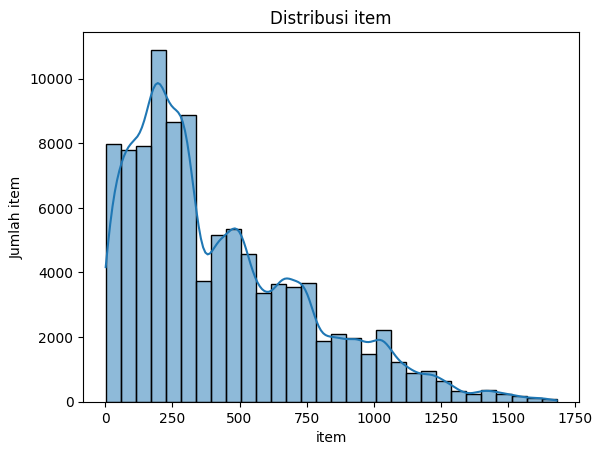

In [9]:
sns.histplot(data=rating_df, x='item_id', bins=30, kde=True)
plt.title('Distribusi item')
plt.xlabel('item')
plt.ylabel('Jumlah item')
plt.show()

Dari gambar diatas dapat dilihat Distribusi dari item

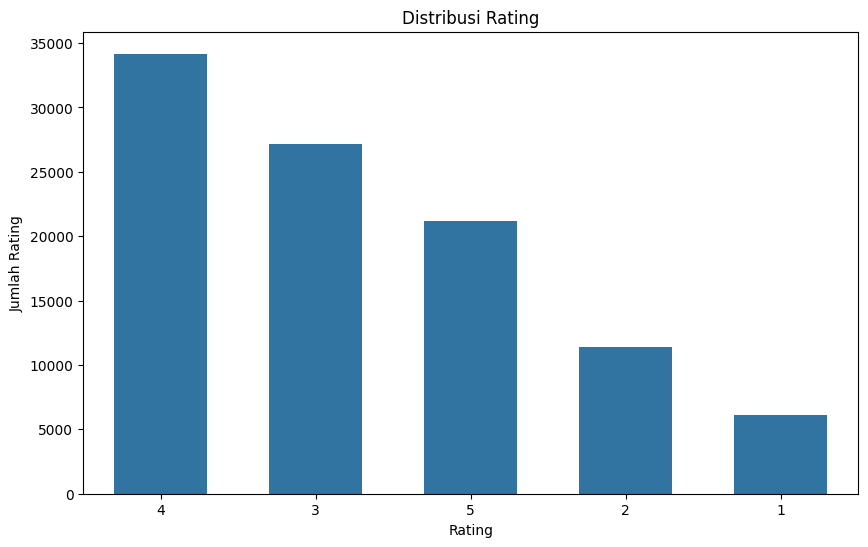

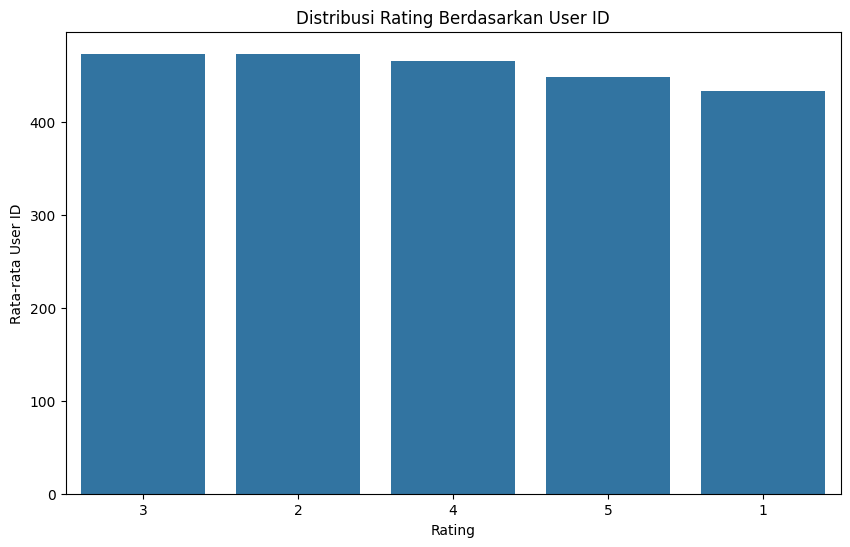

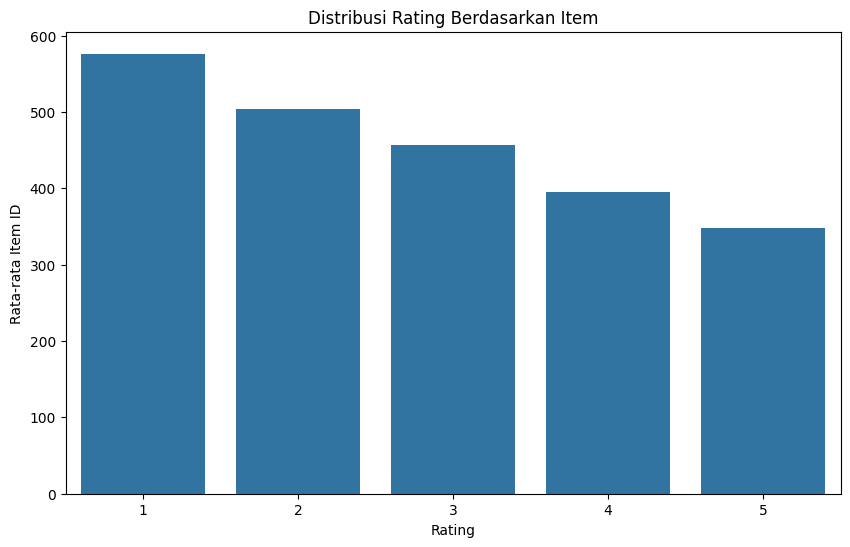

In [10]:
def plot_rating_distribution(data, groupby_col=None, title='', xlabel='Rating', ylabel='Count'):

    plt.figure(figsize=(10, 6))

    if groupby_col is None:
        # Distribusi rating dasar
        ratings = data['rating'].value_counts().nlargest(10).sort_values(ascending=False)
        sns.barplot(x=ratings.index.astype(str), y=ratings.values, width=0.6)
    else:
        # Distribusi rating berdasarkan kolom tertentu
        avg_rating = data.groupby('rating')[groupby_col].mean().sort_values(ascending=False).head(10)
        sns.barplot(x=avg_rating.index.astype(str), y=avg_rating.values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Contoh penggunaan:
# 1. Distribusi rating dasar
plot_rating_distribution(rating_df,
                        title='Distribusi Rating',
                        ylabel='Jumlah Rating')

# 2. Distribusi berdasarkan user_id
plot_rating_distribution(rating_df,
                        groupby_col='user_id',
                        title='Distribusi Rating Berdasarkan User ID',
                        ylabel='Rata-rata User ID')

# 3. Distribusi berdasarkan item_id
plot_rating_distribution(rating_df,
                        groupby_col='item_id',
                        title='Distribusi Rating Berdasarkan Item',
                        ylabel='Rata-rata Item ID')

kode ini merupakan sebuah Fungsi untuk membuat visualisasi distribusi rating
    
    Parameters:
    - data: DataFrame yang berisi data rating
    - groupby_col: Kolom untuk pengelompokan (None untuk distribusi sederhana)
    - title: Judul plot
    - xlabel: Label sumbu x
    - ylabel: Label sumbu y

Visualisasi tersebut menunjukkan distribusi rating dari tiga perspektif: (1) jumlah rating untuk setiap nilai rating, (2) distribusi rating berdasarkan User ID, dan (3) distribusi rating berdasarkan jumlah Item, memberikan gambaran komprehensif tentang pola pemberian rating dalam dataset.

### Title Variable

In [11]:
title_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [12]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Berdasarkan output diatas dapat dilihat bahwa title:
- 1682 baris
- 2 kolom (`item_id`&`title`)
- tipe data int untuk `item_ID` & object untuk `title`

### Melihat Nilai Unik

In [13]:
print('Jumlah item_id: ', len(title_df.item_id.unique()))
print('title: ', title_df.title.unique())

Jumlah item_id:  1682
title:  ['Toy Story (1995)' 'GoldenEye (1995)' 'Four Rooms (1995)' ...
 'B. Monkey (1998)' 'You So Crazy (1994)'
 'Scream of Stone (Schrei aus Stein) (1991)']


Berdasarkan output di atas, dapat diketahui bahwa terdapat 1682 item unik berdasarkan kolom item_id. Setiap item memiliki judul film yang berbeda, seperti contohnya 'Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', hingga 'Scream of Stone (Schrei aus Stein) (1991)'. Judul-judul ini mencerminkan koleksi film dari berbagai genre dan tahun rilis, menunjukkan bahwa dataset mencakup beragam film yang kemungkinan digunakan untuk keperluan analisis preferensi atau rekomendasi dalam sistem berbasis konten.

## Data Preparation

### Combine Two Dataset

In [14]:
# Merge rating and movie title data
movie_df = pd.merge(
    rating_df,
    title_df,
    on='item_id',
    how='left'
)

In [15]:
movie_df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)
...,...,...,...,...,...
99998,880,476,3,880175444,"First Wives Club, The (1996)"
99999,716,204,5,879795543,Back to the Future (1985)
100000,276,1090,1,874795795,Sliver (1993)
100001,13,225,2,882399156,101 Dalmatians (1996)


Pada tahap ini kita menggabungkan dua data yang telah kita gabungkan sebelumnya menjadi kesatuan data seperti diatas.

### Handling Missing Values & Data Duplicated

In [16]:
movie_df.isnull().sum()
movie_df.duplicated().sum()

np.int64(0)

Dapat diketahui bahwa tidak terdapat duplikat data maupun data hilang, maka kita dapat melanjutkan ke tahap berikutnya

### Drop Irelevant Columns

In [17]:
movie_df.drop('timestamp',axis=1,inplace=True)

Fungsi kode ini adalah untuk Menghapus kolom 'timestamp' dari DataFrame movie_df.

### Rating Statistics & Popularity Analysis

In [18]:
# Calculate key statistics per movie
rating_stats = (
    movie_df.groupby('title')['rating']
    .agg(['count', 'mean', 'std'])
    .rename(columns={'count': 'num_ratings', 'mean': 'avg_rating', 'std': 'rating_std'})
    .sort_values('num_ratings', ascending=False)
    .reset_index()
)

Fungsi kode ini adalah untuk Menghitung statistik jumlah rating, rata-rata rating, dan standar deviasi rating untuk setiap film, lalu mengurutkannya berdasarkan jumlah rating terbanyak.

**Parameter/Tahapan:**

* `groupby('title')['rating']`: Mengelompokkan data berdasarkan judul film dan mengambil kolom 'rating'.

* `.agg(['count', 'mean', 'std'])`: Menghitung 3 metrik sekaligus:

 - `count`: Jumlah rating per film.

 - `mean`: Rata-rata rating per film.

 - `std`: Standar deviasi rating per film.

* `.rename(columns=...)`: Mengubah nama kolom hasil agregasi agar lebih deskriptif:

 - `'count'` → `'num_ratings'`

 - `'mean'` → `'avg_rating'`

 - `'std'` → `'rating_std'`

* `.sort_values('num_ratings', ascending=False)`: Mengurutkan film berdasarkan jumlah rating (dari terbanyak).

* `.reset_index()`: Mengubah judul film (yang awalnya menjadi index karena `groupby`) kembali menjadi kolom.

In [19]:
# Filter perfect-rated movies (mean=5) with at least 5 ratings
perfect_movies = rating_stats[
    (rating_stats['avg_rating'] == 5) &
    (rating_stats['num_ratings'] >= 5)
]

Fungsi: Memilih film yang memiliki rata-rata rating sempurna (5.0) dan setidaknya 5 rating.

Parameter/Kondisi:

* `rating_stats['avg_rating'] == 5`: Rata-rata rating harus tepat 5.

* `rating_stats['num_ratings'] >= 5`: Jumlah rating minimal 5 (untuk menghindari film dengan sedikit rating).

### User-Item Matrix & Correlation

In [20]:
# Create user-item rating matrix (sparse)
user_item_matrix = movie_df.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
)

# Compute correlations with a reference movie (e.g., 'Titanic (1997)')
ref_movie = 'Titanic (1997)'
correlations = (
    user_item_matrix.corrwith(user_item_matrix[ref_movie])
    .to_frame(name='correlation')
    .dropna()
    .merge(rating_stats, on='title')
    .sort_values('correlation', ascending=False)
)

# Filter for statistically significant recommendations (min 80 ratings)
high_conf_recommendations = correlations[correlations['num_ratings'] >= 80].head(10)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### Enhanced Recommendations with Bayesian Average

In [21]:
# Calculate Bayesian weighted rating (adjusts for low samples)
global_avg = rating_stats['avg_rating'].mean()
min_ratings = 50

rating_stats['bayesian_avg'] = (
    (rating_stats['num_ratings'] * rating_stats['avg_rating'] +
     min_ratings * global_avg) /
    (rating_stats['num_ratings'] + min_ratings)
)

# Merge with correlations for better recommendations
final_recommendations = (
    correlations.merge(
        rating_stats[['title', 'bayesian_avg']],
        on='title'
    )
    .sort_values(['correlation', 'bayesian_avg'], ascending=False)
    .head(10)
)

### Simplified Movie Recommendation Report

In [22]:
# Mengubah semua hasil menjadi DataFrame yang terstruktur
results = pd.concat([
    perfect_movies.assign(category="Perfect 5-Star Movies"),
    high_conf_recommendations.assign(category=f"Top Recommendations for '{ref_movie}'"),
    final_recommendations.assign(category="Enhanced Bayesian Recommendations")
])

# Mengatur ulang kolom untuk tampilan yang lebih baik
final_results = results[[
    'category', 'title', 'correlation', 'bayesian_avg',
    'avg_rating', 'num_ratings', 'rating_std'
]].sort_values(['category', 'correlation'], ascending=[True, False])

# Menambahkan ranking per kategori
final_results['rank'] = final_results.groupby('category').cumcount() + 1

# Formatting tanpa bar warna (hanya format angka)
clean_results = (
    final_results.style
    .format({
        'correlation': '{:.3f}',
        'bayesian_avg': '{:.2f}',
        'avg_rating': '{:.2f}',
        'num_ratings': '{:,}',
        'rating_std': '{:.2f}'
    })
)

clean_results

,category,title,correlation,bayesian_avg,avg_rating,num_ratings,rating_std,rank
9,Enhanced Bayesian Recommendations,Titanic (1997),1.000,4.10,4.25,350,0.95,1
1,Enhanced Bayesian Recommendations,Hearts and Minds (1996),1.000,3.14,3.80,5,1.10,2
10,Enhanced Bayesian Recommendations,Year of the Horse (1997),1.000,3.10,3.29,7,1.89,3
6,Enhanced Bayesian Recommendations,Purple Noon (1960),1.000,3.09,3.14,7,1.21,4
7,Enhanced Bayesian Recommendations,"Savage Nights (Nuits fauves, Les) (1992)",1.000,3.07,3.00,3,1.00,5
4,Enhanced Bayesian Recommendations,"Newton Boys, The (1998)",1.000,3.07,3.00,4,1.15,6
2,Enhanced Bayesian Recommendations,"Jerky Boys, The (1994)",1.000,3.05,2.67,3,1.53,7
0,Enhanced Bayesian Recommendations,For Ever Mozart (1996),1.000,3.02,2.00,3,1.73,8
8,Enhanced Bayesian Recommendations,"Simple Wish, A (1997)",1.000,3.00,1.67,3,1.15,9
3,Enhanced Bayesian Recommendations,Nadja (1994),1.000,2.96,2.25,8,1.04,10


## Collaborative filtering

### Data Preparation

In [23]:
# Load dataset
df = movie_df[['user_id', 'item_id', 'rating']].rename(columns={'user_id': 'userID', 'item_id': 'movieID'})
df.head()

,userID,movieID,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


#### **Fungsi Utama**:
Kode ini bertujuan untuk **menyiapkan data** (data preparation) sebelum membangun sistem rekomendasi, khususnya dengan:
1. **Seleksi kolom** yang esensial untuk collaborative filtering.
2. **Standardisasi nama kolom** agar kompatibel dengan library recommender system populer.

---

#### **Alasan Penggunaan Fungsi Ini**:
1. **Kompatibilitas dengan Library Recommender System**:
   - Library seperti Surprise mengharuskan input data memiliki kolom dengan nama spesifik (`userID`, `itemID`, `rating`).

2. **Efisiensi Memori**:
   - Dengan hanya memilih 3 kolom, ukuran DataFrame menjadi lebih kecil, mempercepat proses training model.

3. **Konsistensi Data**:
   - Penyeragaman nama kolom memudahkan kolaborasi tim dan maintenance kode.

4. **Fleksibilitas**:
   - Format ini cocok untuk berbagai algoritma collaborative filtering (KNN, Matrix Factorization, dll.).

---

### User Encoding

In [24]:
# Get unique user IDs
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids[:5])

# Create userID to integer mapping
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID sample: ', {k: user_to_user_encoded[k] for k in list(user_to_user_encoded)[:5]})

# Create integer to userID mapping
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID sample: ', {k: user_encoded_to_user[k] for k in list(user_encoded_to_user)[:5]})

list userID:  [0, 196, 186, 22, 244]
encoded userID sample:  {0: 0, 196: 1, 186: 2, 22: 3, 244: 4}
encoded angka ke userID sample:  {0: 0, 1: 196, 2: 186, 3: 22, 4: 244}


#### **Fungsi Utama**:
Kode ini bertujuan untuk **membuat pemetaan identifier pengguna** (userID) dalam sistem rekomendasi, khususnya dengan:
1. **Mengidentifikasi semua user unik** dalam dataset
2. **Membuat kamus konversi dua arah** antara:
   - UserID asli → indeks numerik (encoding)
   - Indeks numerik → UserID asli (decoding)

---

#### **Alasan Penggunaan Fungsi Ini**:
1. **Kompatibilitas dengan Algoritma Recommender System**:
   - Library seperti TensorFlow Recommenders memerlukan input berupa indeks integer untuk embedding layer.

2. **Optimasi Pemrosesan Data**:
   - Operasi matematika dan pencarian lebih efisien menggunakan integer dibanding ID asli.

3. **Konsistensi Representasi Data**:
   - Memastikan semua user memiliki representasi numerik yang konsisten.

4. **Fleksibilitas Transformasi**:
   - Memungkinkan konversi bolak-balik antara ID asli dan representasi model.

5. **Persiapan untuk Neural Networks**:
   - Layer embedding membutuhkan input berupa indeks integer yang berurutan.

---


### Movie Encoding

In [25]:
# Mengubah movieID menjadi list tanpa nilai yang sama
movie_ids = df['movieID'].unique().tolist()

# Melakukan proses encoding movieID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

#### **Fungsi Utama**:
Kode ini bertujuan untuk **membuat pemetaan identifier film** (movieID) dalam sistem rekomendasi, khususnya dengan:
1. **Mengidentifikasi semua film unik** dalam dataset
2. **Membuat kamus konversi dua arah** antara:
   - MovieID asli → indeks numerik (encoding)
   - Indeks numerik → MovieID asli (decoding)

---

#### **Alasan Penggunaan Fungsi Ini**:

1. **Kompatibilitas dengan Algoritma Recommender System**:
   - Framework seperti TensorFlow dan PyTorch membutuhkan input berupa indeks integer untuk embedding layer.

2. **Optimasi Pemrosesan Data**:
   - Representasi numerik mempercepat operasi matriks dan vektor dalam komputasi.

3. **Konsistensi Representasi**:
   - Memastikan setiap film memiliki representasi unik yang konsisten di seluruh pipeline.

4. **Fleksibilitas Transformasi**:
   - Memungkinkan konversi bolak-balik antara ID asli dan representasi model.

5. **Persiapan untuk Sistem Rekomendasi**:
   - Langkah esensial untuk membangun matriks user-item dan model collaborative filtering.

---

### Mapping To Dataframe

In [26]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)

# Mapping movieID ke dataframe movie
df['movie'] = df['movieID'].map(movie_to_movie_encoded)

#### **Fungsi Utama**:
Kode ini bertujuan untuk **mengaplikasikan mapping identifier** yang telah dibuat sebelumnya ke dalam dataframe utama, dengan:
1. **Menambahkan kolom baru** yang berisi hasil encoding:
   - `user`: encoded userID (integer)
   - `movie`: encoded movieID (integer)
2. **Mengubah ID asli** menjadi representasi numerik yang siap diproses oleh model machine learning

---

#### **Alasan Penggunaan Fungsi Ini**:

1. **Transformasi Data untuk Model**:
   - Mengkonversi ID kategorikal (userID dan movieID) menjadi representasi numerik yang dibutuhkan algoritma ML

2. **Konsistensi Pipeline Data**:
   - Memastikan seluruh data menggunakan skema encoding yang sama

3. **Optimasi Memori**:
   - Penyimpanan nilai integer lebih efisien daripada string/ID asli

4. **Persiapan Input Model**:
   - Langkah penting sebelum membangun matriks user-item atau model embedding

5. **Kompatibilitas Library**:
   - Format ini diperlukan oleh library seperti TensorFlow, PyTorch, atau scikit-learn

---

### Dataset Statistics

In [27]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print("Number of users:", num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print("Number of movies:", num_movie)

Number of users: 944
Number of movies: 1682


---
Dua baris kode ini berfungsi untuk **menghitung total jumlah pengguna (user)** dan **total jumlah film (movie)** yang ada di data Anda.

* **`num_users = len(user_to_user_encoded)`**
    * Menghitung berapa banyak pengguna unik yang ada.
    * Berguna untuk mengetahui skala data pengguna dan penting saat membuat model *machine learning* agar ukurannya pas.

* **`num_movie = len(movie_encoded_to_movie)`**
    * Menghitung berapa banyak film unik yang ada.
    * Mirip dengan pengguna, ini penting untuk mengetahui skala data film dan untuk mengatur dimensi model *machine learning* dengan benar.

Singkatnya, kedua kode ini membantu Anda tahu **seberapa besar (berapa banyak)** data pengguna dan film yang Anda miliki, yang sangat penting untuk analisis data dan pembangunan model.

In [28]:
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

In [29]:
# Convert ratings to float and get min/max
df['rating'] = df['rating'].values.astype(np.float32)
min_rating = min(df['rating'])
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 944, Number of Movie: 1682, Min Rating: 1.0, Max Rating: 5.0


Fungsi kode ini adalah untuk **menyiapkan data *rating***.

Pertama, `df['rating'] = df['rating'].values.astype(np.float32)` memastikan semua nilai *rating* disimpan sebagai **angka desimal (float)**. Ini penting karena model *machine learning* sering butuh data dalam format ini agar bisa bekerja dengan baik dan lebih efisien.

Setelah itu, `min_rating = min(df['rating'])` dan `max_rating = max(df['rating'])` mencari **nilai *rating* terendah dan tertinggi** yang ada di data Anda.

---

### Train-Test Split

In [30]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head()

,userID,movieID,rating,user,movie
87184,330,228,5.0,316,184
98871,894,318,5.0,893,202
1956,199,258,4.0,260,160
11529,181,1374,1.0,36,1283
39495,314,1016,4.0,265,90


Kode ini berfungsi untuk **mengacak urutan baris (data) dalam dataset `df`

* **`df.sample(frac=1, random_state=42)`**: Ini adalah bagian inti yang melakukan pengacakan.
    * **`frac=1`**: Berarti Anda ingin mengambil 100% dari data (*fraction* 1) untuk diacak. Jadi, semua baris akan diacak ulang.
    * **`random_state=42`**: Ini adalah "seed" atau angka awal untuk proses pengacakan. Menggunakan angka yang sama (misalnya, 42) akan memastikan bahwa **setiap kali Anda menjalankan kode ini, hasil pengacakannya akan selalu sama**. Ini sangat penting untuk **reproducibility** (hasil yang bisa diulang) dalam eksperimen atau pengembangan model *machine learning*.
* **`df = ...`**: Hasil pengacakan kemudian disimpan kembali ke variabel `df`, menimpa urutan data sebelumnya.
* **`df.head()`**: Baris ini hanya menampilkan 5 baris pertama dari DataFrame `df` yang sudah diacak untuk memverifikasi bahwa pengacakan berhasil dilakukan.

---

In [31]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

### Menggabungkan User dan Movie sebagai Input (`x`)

Kode ini berfungsi untuk **menggabungkan data pengguna (*user*) dan film (*movie*) menjadi satu variabel input tunggal**, yang akan dipakai sebagai fitur untuk model.

* `x = df[['user', 'movie']].values` mengambil kolom 'user' dan 'movie' dari data Anda, lalu mengubahnya menjadi kumpulan pasangan `[ID_user, ID_movie]`. Ini adalah "apa yang model lihat" — siapa yang menonton apa.

### Menyiapkan Rating sebagai Output dan Normalisasi (`y`)

Kode ini bertugas **menyiapkan nilai *rating* sebagai target (output) untuk model**, sekaligus **menormalkannya** ke rentang 0 hingga 1.

* `y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values` mengambil kolom 'rating', lalu **menyesuaikan skalanya** agar setiap *rating* berada di antara 0 dan 1. Angka 0 berarti *rating* terendah, dan 1 berarti *rating* tertinggi. Normalisasi ini sangat penting agar model dapat belajar lebih baik dan efisien. Ini adalah "apa yang model prediksi" — seberapa tinggi *rating* dari pasangan user-film tersebut.

---

In [32]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Kode ini berfungsi untuk membagi dataset Anda menjadi dua bagian utama: 80% untuk data pelatihan (train) dan 20% untuk data validasi (validation). Ini adalah langkah krusial dalam membangun model machine learning.

### Model Architecture

In [33]:
class RecommenderNet(tf.keras.Model):
    # Insialisasi fungsi
    def __init__(self, num_users, num_movie, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movie = num_movie
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.movie_embedding = layers.Embedding( # layer embeddings movie
            num_movie,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
        movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x) # activation sigmoid

Kode ini mendefinisikan sebuah arsitektur model neural network bernama RecommenderNet menggunakan TensorFlow dan Keras. Model ini dirancang khusus untuk sistem rekomendasi, bekerja dengan memodelkan interaksi antara pengguna dan film untuk memprediksi rating.

### Model Training

In [34]:
# Inisialisasi model
embedding_size = 50
model = RecommenderNet(num_users, num_movie, embedding_size)

# Model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_val, y_val)
)

Epoch 1/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.6657 - root_mean_squared_error: 0.2881 - val_loss: 0.6298 - val_root_mean_squared_error: 0.2563
Epoch 2/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6249 - root_mean_squared_error: 0.2533 - val_loss: 0.6197 - val_root_mean_squared_error: 0.2473
Epoch 3/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6163 - root_mean_squared_error: 0.2464 - val_loss: 0.6171 - val_root_mean_squared_error: 0.2451
Epoch 4/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6150 - root_mean_squared_error: 0.2438 - val_loss: 0.6143 - val_root_mean_squared_error: 0.2426
Epoch 5/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6132 - root_mean_squared_error: 0.2413 - val_loss: 0.6139 - val_root_mean_squared_error: 0.2423
Epoch 6/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.6093 - root_mean_squared_error: 0.2391 - val_loss: 0.6144 - val_root_mean_squared_error: 0.2427
Epoch 7/10
2501/2501 ━━━━━━━━━━━━━━━━

Kode ini adalah langkah-langkah kunci dalam membangun dan melatih model rekomendasi yang telah Anda definisikan sebelumnya (RecommenderNet). Model ini dirancang khusus untuk sistem rekomendasi, bekerja dengan memodelkan interaksi antara pengguna dan film untuk memprediksi rating.

### Visualization

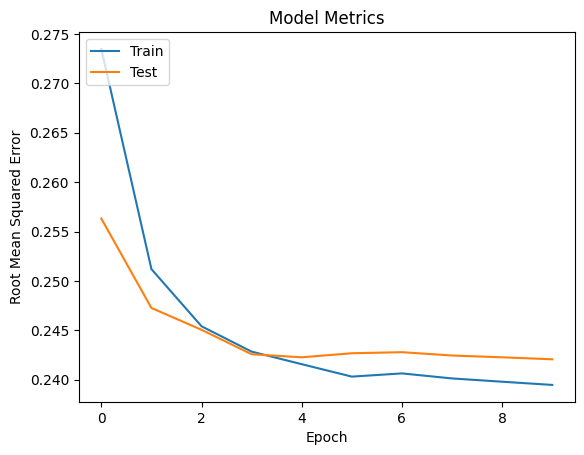

In [35]:
# Plot training history
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---
#### Memvisualisasikan Metrik Pelatihan Model

Kode ini berfungsi untuk **menggambarkan performa model Anda selama proses pelatihan** menggunakan *plot*. Ini adalah langkah penting untuk memahami bagaimana model belajar dan mendeteksi masalah seperti *overfitting*.

* **`plt.plot(history.history['root_mean_squared_error'])`**: Baris ini menggambar garis yang menunjukkan nilai **RMSE (Root Mean Squared Error) pada data pelatihan** di setiap *epoch*. `history` adalah objek yang menyimpan semua metrik pelatihan dari `model.fit()`.
* **`plt.plot(history.history['val_root_mean_squared_error'])`**: Baris ini menggambar garis lain yang menunjukkan nilai **RMSE pada data validasi** di setiap *epoch*.
* **`plt.title('Model Metrics')`**: Memberikan judul pada *plot* yaitu 'Model Metrics'.
* **`plt.ylabel('Root Mean Squared Error')`**: Memberikan label pada sumbu Y, menunjukkan apa yang diukur (RMSE).
* **`plt.xlabel('Epoch')`**: Memberikan label pada sumbu X, menunjukkan *epoch* (berapa kali model telah melihat seluruh data pelatihan).
* **`plt.legend(['Train', 'Test'], loc='upper left')`**: Menampilkan legenda yang menjelaskan garis mana yang mewakili data 'Train' dan garis mana yang mewakili data 'Test' (atau validasi), diletakkan di kiri atas *plot*.
* **`plt.show()`**: Menampilkan *plot* yang telah dibuat.

---

### Recommendation Function


In [36]:
def get_recommendations(user_id, n_recommendations=10):
    # Get watched movies
    watched_movies = df[df['userID'] == user_id]['movieID'].unique()

    # Get unwatched movies
    movies_not_watched = [
        [movie_to_movie_encoded.get(x)]
        for x in movie_ids
        if x not in watched_movies
    ]

    # Prepare input array
    user_encoder = user_to_user_encoded.get(user_id)
    user_movie_array = np.hstack(
        ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
    )

    # Get predictions
    ratings = model.predict(user_movie_array).flatten()

    # Get top recommendations
    top_ratings_indices = ratings.argsort()[-n_recommendations:][::-1]
    recommended_movie_ids = [
        movie_encoded_to_movie.get(movies_not_watched[x][0])
        for x in top_ratings_indices
    ]

    # Get movie titles
    recommended_movies = title_df[title_df['item_id'].isin(recommended_movie_ids)]

    # Get user's top rated movies
    top_movies_user = (
        df[df['userID'] == user_id]
        .sort_values(by='rating', ascending=False)
        .head(5)
        .merge(title_df, left_on='movieID', right_on='item_id')
    )

    print(f'Showing recommendations for user: {user_id}')
    print('='*40)
    print('Movies with high ratings from user')
    print('-'*40)
    for _, row in top_movies_user.iterrows():
        print(f"{row['title']} - Rating: {row['rating']}")

    print('\n' + '-'*40)
    print('Top movie recommendations')
    print('-'*40)
    for _, row in recommended_movies.iterrows():
        print(row['title'])

    return recommended_movies

Fungsi get_recommendations ini dirancang untuk menghasilkan daftar rekomendasi film untuk pengguna tertentu berdasarkan model yang sudah latih. Tujuannya adalah untuk merekomendasikan film yang kemungkinan besar akan disukai pengguna, tetapi belum pernah mereka tonton.

In [37]:
# Contoh penggunaan
sample_user = df['userID'].sample(1).iloc[0]
get_recommendations(sample_user)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Showing recommendations for user: 151
Movies with high ratings from user
----------------------------------------
Day the Earth Stood Still, The (1951) - Rating: 5.0
Philadelphia Story, The (1940) - Rating: 5.0
Star Trek: The Wrath of Khan (1982) - Rating: 5.0
Contact (1997) - Rating: 5.0
Sense and Sensibility (1995) - Rating: 5.0

----------------------------------------
Top movie recommendations
----------------------------------------
Braveheart (1995)
Priest (1994)
Godfather, The (1972)
Jean de Florette (1986)
Shall We Dance? (1996)
Lawrence of Arabia (1962)
Third Man, The (1949)
Boot, Das (1981)
Hard Eight (1996)
Mina Tannenbaum (1994)


,item_id,title
21,22,Braveheart (1995)
56,57,Priest (1994)
126,127,"Godfather, The (1972)"
164,165,Jean de Florette (1986)
250,251,Shall We Dance? (1996)
510,511,Lawrence of Arabia (1962)
512,513,"Third Man, The (1949)"
514,515,"Boot, Das (1981)"
1142,1143,Hard Eight (1996)
1367,1368,Mina Tannenbaum (1994)


Kode ini menunjukkan cara menggunakan fungsi `get_recommendations` yang telah buat. Tujuannya adalah untuk mendapatkan dan menampilkan rekomendasi film untuk seorang pengguna acak dari dataset